<a href="https://colab.research.google.com/github/Udhay2898/Weather/blob/Master/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/Seattle_Weather_1948-2017(1).csv')
df.head()

,DATE,YEAR,MONTH,DAY,SEASON,PRCP,TMAX,TMIN,CLIMATE,DIFF TEMP,AVE TEMP,PRCP TYPE,WEEK NO,WEEK END
0,01-01-1948,1948,January,Thursday,Winter,0.47,51,42,RAIN,9,46.5,Heavy,1,No
1,02-01-1948,1948,January,Friday,Winter,0.59,45,36,RAIN,9,40.5,Heavy,1,No
2,03-01-1948,1948,January,Saturday,Winter,0.42,45,35,RAIN,10,40.0,Heavy,1,Yes
3,04-01-1948,1948,January,Sunday,Winter,0.31,45,34,RAIN,11,39.5,Heavy,1,Yes
4,05-01-1948,1948,January,Monday,Winter,0.17,45,32,RAIN,13,38.5,Moderate,2,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       25551 non-null  object 
 1   YEAR       25551 non-null  int64  
 2   MONTH      25551 non-null  object 
 3   DAY        25551 non-null  object 
 4   SEASON     25551 non-null  object 
 5   PRCP       25548 non-null  float64
 6   TMAX       25551 non-null  int64  
 7   TMIN       25551 non-null  int64  
 8   CLIMATE    25548 non-null  object 
 9   DIFF TEMP  25551 non-null  int64  
 10  AVE TEMP   25551 non-null  float64
 11  PRCP TYPE  10903 non-null  object 
 12  WEEK NO    25551 non-null  int64  
 13  WEEK END   25551 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 2.7+ MB


In [ ]:
# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')

In [ ]:
df.dtypes

,0
DATE,datetime64[ns]
YEAR,int64
MONTH,object
DAY,object
SEASON,object
PRCP,float64
TMAX,int64
TMIN,int64
CLIMATE,object
DIFF TEMP,int64


In [ ]:
df.columns

Index(['DATE', 'YEAR', 'MONTH', 'DAY', 'SEASON', 'PRCP', 'TMAX', 'TMIN',
       'CLIMATE', 'DIFF TEMP', 'AVE TEMP', 'PRCP TYPE', 'WEEK NO', 'WEEK END'],
      dtype='object')

In [ ]:
df.describe()

,DATE,YEAR,PRCP,TMAX,TMIN,DIFF TEMP,AVE TEMP,WEEK NO
count,25551,25551.000000,25548.000000,25551.000000,25551.000000,25551.000000,25551.000000,25551.000000
mean,1982-12-23 00:00:00,1982.476694,0.106222,59.544206,44.514226,15.029979,52.029216,27.015890
min,1948-01-01 00:00:00,1948.000000,0.000000,4.000000,0.000000,-35.000000,10.000000,1.000000
25%,1965-06-27 12:00:00,1965.000000,0.000000,50.000000,38.000000,10.000000,44.500000,14.000000
50%,1982-12-23 00:00:00,1982.000000,0.000000,58.000000,45.000000,14.000000,51.500000,27.000000
75%,2000-06-18 12:00:00,2000.000000,0.100000,69.000000,52.000000,19.000000,60.500000,40.000000
max,2017-12-14 00:00:00,2017.000000,5.020000,103.000000,71.000000,42.000000,87.000000,54.000000
std,NaN,20.193095,0.239031,12.772984,8.892836,6.834089,10.461340,15.059628


In [ ]:
df.isnull().any()

,0
DATE,False
YEAR,False
MONTH,False
DAY,False
SEASON,False
PRCP,True
TMAX,False
TMIN,False
CLIMATE,True
DIFF TEMP,False


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated() == 1

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [ ]:
df.nunique()

,0
DATE,25551
YEAR,70
MONTH,12
DAY,7
SEASON,6
PRCP,207
TMAX,87
TMIN,68
CLIMATE,2
DIFF TEMP,42


In [ ]:
df = df.fillna('No Event')

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}:\n {unique_values}\n")

DATE:
 <DatetimeArray>
['1948-01-01 00:00:00', '1948-01-02 00:00:00', '1948-01-03 00:00:00',
 '1948-01-04 00:00:00', '1948-01-05 00:00:00', '1948-01-06 00:00:00',
 '1948-01-07 00:00:00', '1948-01-08 00:00:00', '1948-01-09 00:00:00',
 '1948-01-10 00:00:00',
 ...
 '2017-12-05 00:00:00', '2017-12-06 00:00:00', '2017-12-07 00:00:00',
 '2017-12-08 00:00:00', '2017-12-09 00:00:00', '2017-12-10 00:00:00',
 '2017-12-11 00:00:00', '2017-12-12 00:00:00', '2017-12-13 00:00:00',
 '2017-12-14 00:00:00']
Length: 25551, dtype: datetime64[ns]

YEAR:
 [1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]

MONTH:
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'Nov

In [ ]:
# Filter DataFrame for years greater than or equal to 2008
df = df[df['YEAR'] >= 2015]

df.sample(3)

,DATE,YEAR,MONTH,DAY,SEASON,PRCP,TMAX,TMIN,CLIMATE,DIFF TEMP,AVE TEMP,PRCP TYPE,WEEK NO,WEEK END
24937,2016-04-10,2016,April,Sunday,Spring,0.0,58,46,CLEAR,12,52.0,No Event,15,Yes
25270,2017-03-09,2017,March,Thursday,Spring,0.7,49,39,RAIN,10,44.0,Heavy,11,No
24935,2016-04-08,2016,April,Friday,Spring,0.0,76,50,CLEAR,26,63.0,No Event,15,No


In [ ]:
year_gr = df.groupby(['YEAR','SEASON','MONTH','DAY','WEEK END','CLIMATE','PRCP TYPE']).agg({'PRCP' : 'mean',
                                                                                           'TMAX' : 'mean',
                                                                                           'TMIN' : 'mean',
                                                                                           'DIFF TEMP' : 'mean',
                                                                                           'AVE TEMP' : 'mean'
                                                                                           }).reset_index()

year_gr.head()

year_gr_pivot = year_gr.pivot_table(index = ['SEASON'],columns = ['YEAR'],values = ['TMAX'])

year_gr_pivot

TMAX                      
YEAR             2015       2016       2017
SEASON                                     
Autumn      57.011574  58.047619  55.581982
Monsoon     74.142342  73.151316  74.970000
Pre-winter  46.378788  41.750000  46.750000
Spring      57.914286  59.681373  54.045833
Summer      71.919841  69.724691  67.532738
Winter      52.850877  51.370833  46.012255

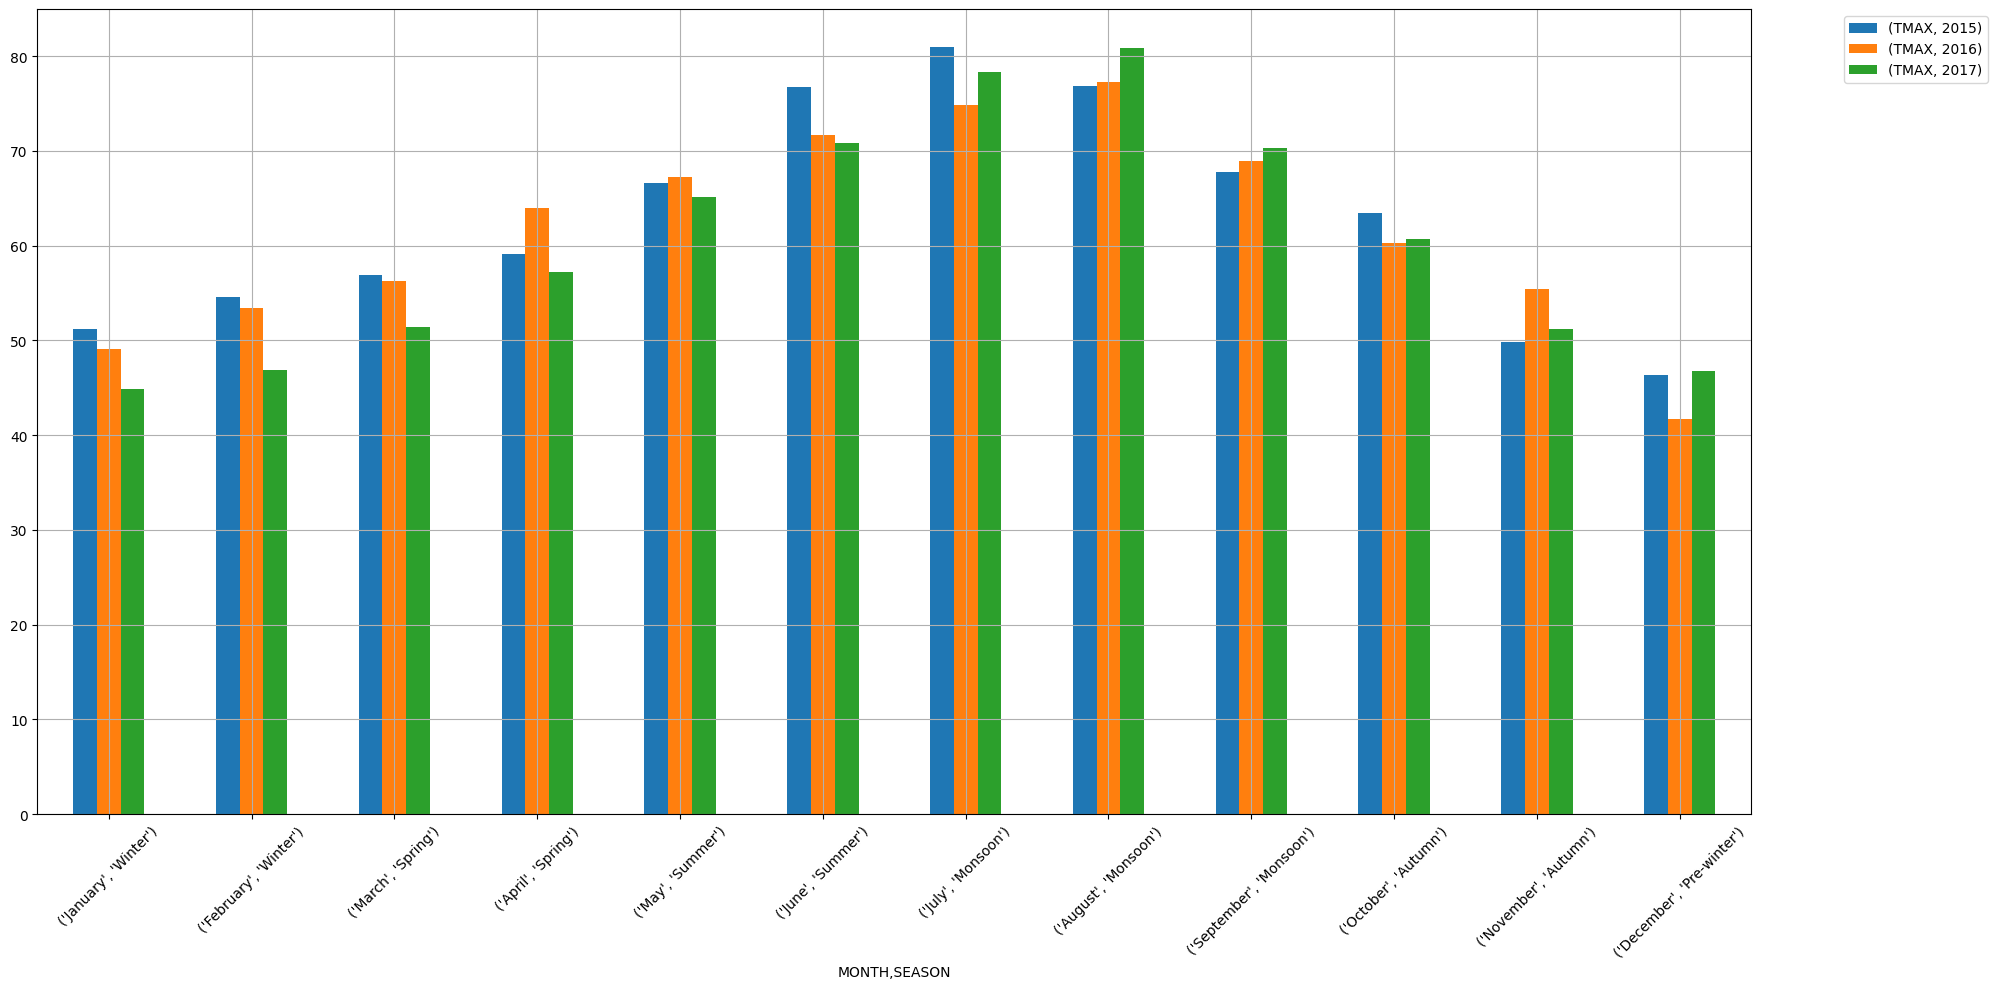

In [ ]:
# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'MONTH' to categorical type with the specified order
year_gr['MONTH'] = pd.Categorical(year_gr['MONTH'], categories=month_order, ordered=True)

year_gr_pivot_Month = year_gr.pivot_table(index = ['MONTH','SEASON'],columns = ['YEAR'],values = ['TMAX'])

year_gr_pivot_Month.plot.bar(figsize = (20,10), grid = True)

tick = range(len(year_gr_pivot_Month))

plt.xticks(ticks = tick,labels = year_gr_pivot_Month.index,rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Axes: xlabel='CLIMATE'>

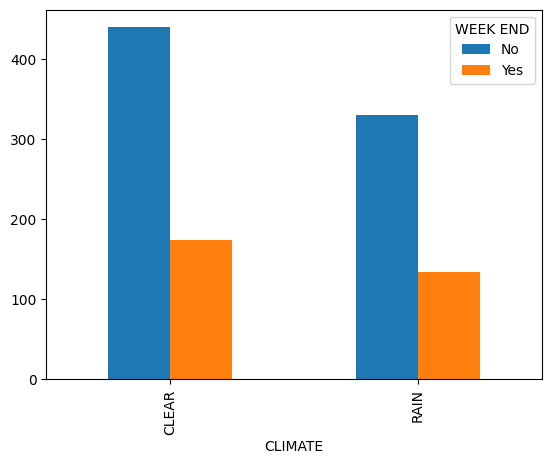

In [ ]:
climate_count = df.groupby(['CLIMATE', 'WEEK END']).size().reset_index(name='Count')
climate_count.pivot_table(index = 'CLIMATE',columns = 'WEEK END',values='Count', fill_value=0).plot(kind='bar')

In [ ]:
df.sample()

,DATE,YEAR,MONTH,DAY,SEASON,PRCP,TMAX,TMIN,CLIMATE,DIFF TEMP,AVE TEMP,PRCP TYPE,WEEK NO,WEEK END
24962,2016-05-05,2016,May,Thursday,Summer,0.0,68,48,CLEAR,20,58.0,No Event,19,No


<Axes: xlabel='SEASON'>

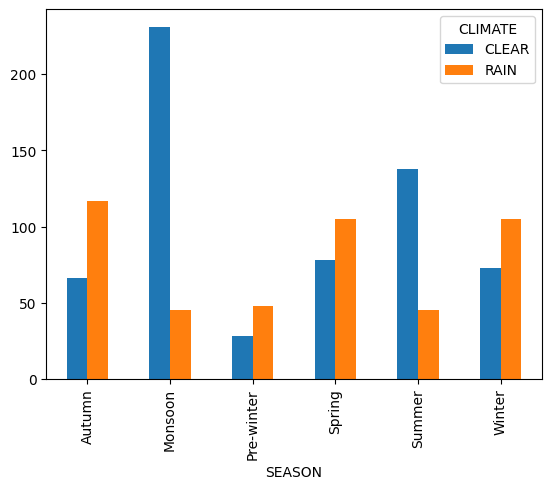

In [ ]:
climate_count = df.groupby(['SEASON','CLIMATE']).size().reset_index(name='Count')
climate_count.pivot_table(index = 'SEASON',columns = 'CLIMATE',values='Count', fill_value=0).plot(kind='bar')

<Axes: xlabel='DAY'>

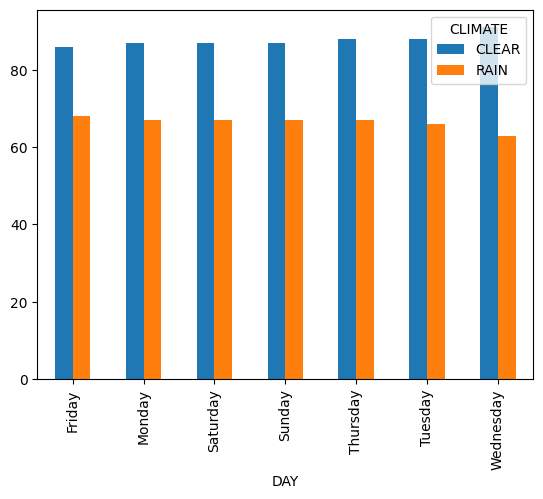

In [ ]:
climate_count = df.groupby(['DAY','CLIMATE']).size().reset_index(name='Count')
climate_count.pivot_table(index = 'DAY',columns = 'CLIMATE',values='Count', fill_value=0).plot(kind='bar')

<Axes: xlabel='MONTH'>

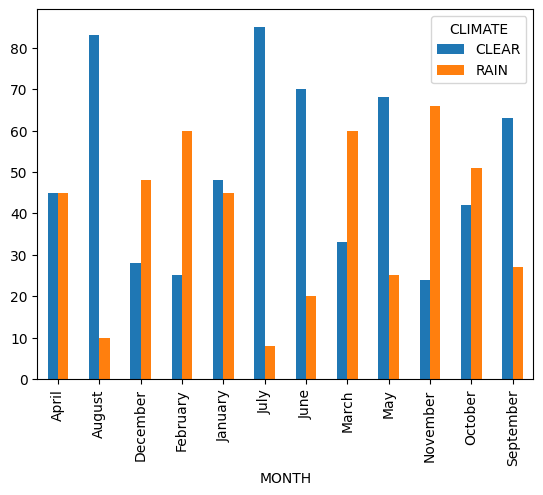

In [ ]:
climate_count = df.groupby(['MONTH','CLIMATE']).size().reset_index(name='Count')
climate_count.pivot_table(index = 'MONTH',columns = 'CLIMATE',values='Count', fill_value=0).plot(kind='bar')

<Axes: xlabel='YEAR'>

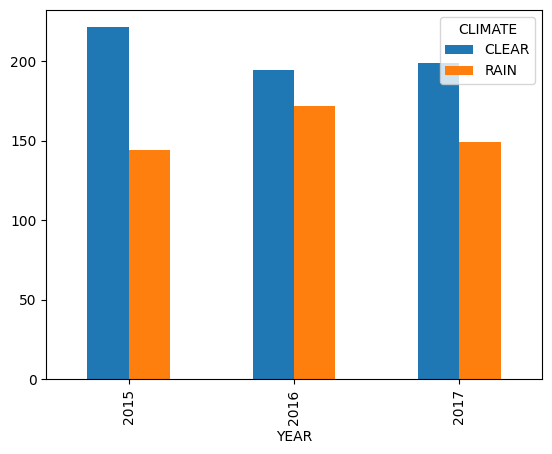

In [ ]:
climate_count = df.groupby(['YEAR','CLIMATE']).size().reset_index(name='Count')
climate_count.pivot_table(index = 'YEAR',columns = 'CLIMATE',values='Count', fill_value=0).plot(kind='bar')